In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (28.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.ndimage
from distort import distort
import afm
import Image
import ImageDraw
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [22]:
file_reference = "s12106033.sxm"
file_tocorrect = "s12106049.sxm"

In [74]:
topo_channel = 1

transform = distort.gen_warp_transform(file_tocorrect, file_reference, topo_channel, topo_channel, progress=0, debug=0, tftype='polynomial', islog=True)

topo_reference = distort.get_channel_for_warp(file_reference, topo_channel, progress=0, debug=0)
topo_tocorrect = distort.get_channel_for_warp(file_tocorrect, topo_channel, progress=0, debug=0)

topo_corrected = distort.apply_warp_transform(topo_tocorrect, transform, progress=0, debug=0)


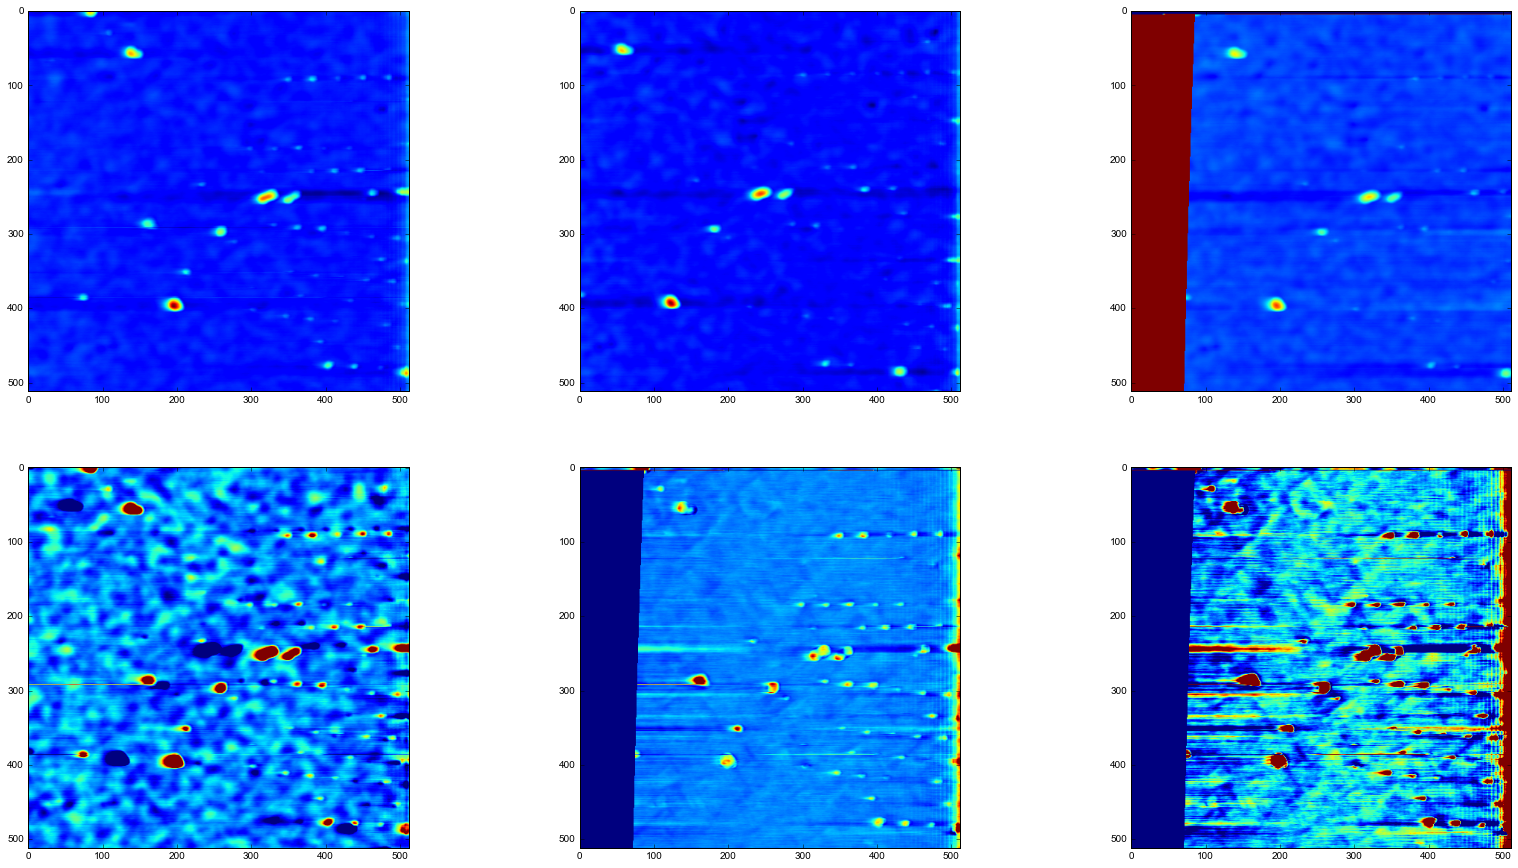

In [106]:
plt.subplot(231)
plt.imshow(afm.tools.line_flatten_image(afm.tools.line_flatten_image(topo_reference)))


plt.subplot(232)
plt.imshow(afm.tools.line_flatten_image(afm.tools.line_flatten_image(topo_tocorrect)))


plt.subplot(233)
plt.imshow(afm.tools.line_flatten_image(topo_corrected, box=[200,500]),vmin=25e-9,vmax=60e-9)


plt.subplot(234)
diff_original = topo_reference-topo_tocorrect
diff_original_offset = []
for k in diff_original:
    diff_original_offset.append(k-np.nanmedian(k))
plt.imshow(diff_original_offset,vmin=-2e-9,vmax=6e-9)


plt.subplot(235)
diff_corrected=afm.tools.line_flatten_image(topo_reference-afm.tools.line_flatten_image(topo_corrected, box=[200,500]),box=[200,500])
diff_corrected_offset = []
for k in diff_corrected:
    diff_corrected_offset.append(k-np.nanmedian(k))
#plt.imshow(afm.tools.line_flatten_image(diff_corrected,box=[200,500]),vmin=25e-9,vmax=45e-9)
plt.imshow(diff_corrected_offset,vmin=-2e-9,vmax=6e-9)
plt.subplot(236)
plt.imshow(diff_corrected_offset,vmin=-0.4e-9,vmax=1e-9)